**Customer churn prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"/content/customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data=data.drop(["customerID"],axis=1)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7036 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7030 non-null   float64
 5   PhoneService      7030 non-null   object 
 6   MultipleLines     7030 non-null   object 
 7   InternetService   7006 non-null   object 
 8   OnlineSecurity    7028 non-null   object 
 9   OnlineBackup      7028 non-null   object 
 10  DeviceProtection  7028 non-null   object 
 11  TechSupport       7028 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7029 non-null   object 
 14  Contract          7018 non-null   object 
 15  PaperlessBilling  7029 non-null   object 
 16  PaymentMethod     7042 non-null   object 


In [7]:
data['Dependents'].nunique()

2

In [8]:
data["MultipleLines"].nunique()

3

In [9]:
data['TotalCharges'].nunique()

6526

In [10]:
data['PaperlessBilling'].nunique()

2

In [16]:
data.dtypes

,0
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [11]:
data.isna().sum()

,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15
OnlineBackup,15


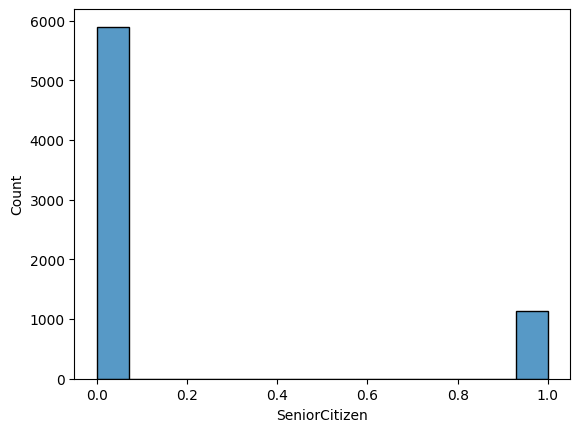

In [12]:
sns.histplot(data['SeniorCitizen'])
plt.show()

There are few number of people are senior citizen

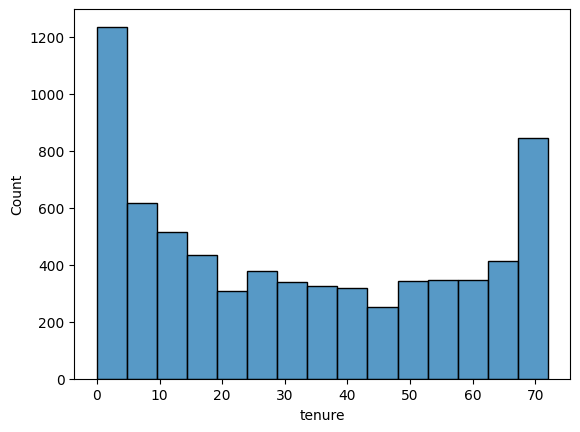

In [13]:
sns.histplot(data['tenure'])
plt.show()

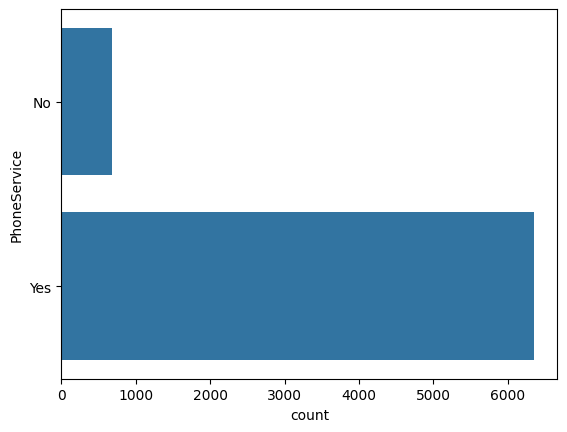

In [14]:
sns.countplot(data['PhoneService'])
plt.show()

Most of your customers use phone service.



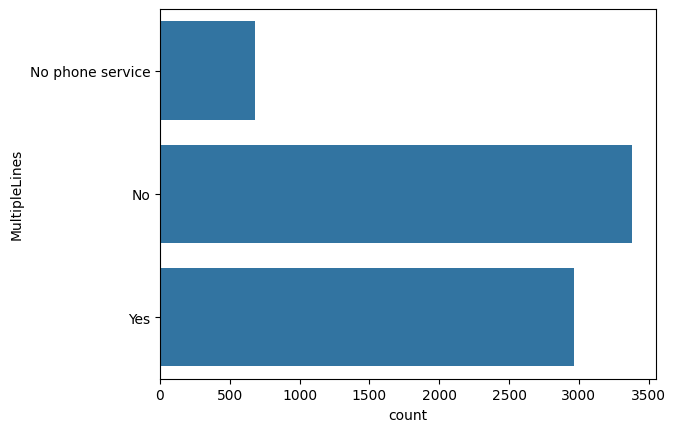

In [15]:
sns.countplot(data["MultipleLines"])
plt.show()

few of the customer does not have phone service.large number of the customer use only one phone survice.also lot of the customer use multiline phone survice


In [17]:
numerical = data.select_dtypes(include=['int64', 'float64'])
categorical = data.select_dtypes(include=['object'])

In [18]:
numerical

,SeniorCitizen,tenure,MonthlyCharges
0,0.0,1.0,29.85
1,0.0,34.0,56.95
2,0.0,2.0,53.85
3,0.0,45.0,42.30
4,0.0,2.0,70.70
...,...,...,...
7038,0.0,24.0,84.80
7039,0.0,72.0,103.20
7040,0.0,11.0,29.60
7041,1.0,4.0,74.40


In [19]:
categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [21]:
categorical.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
categorical.isna().sum()

,0
gender,0
Partner,0
Dependents,0
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15
OnlineBackup,15
DeviceProtection,15
TechSupport,15


In [22]:
for i in ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
          'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
          'TotalCharges']:
    data[i] = data[i].fillna(data[i].mode()[0])

In [23]:
numerical.isna().sum()

,0
SeniorCitizen,7
tenure,13
MonthlyCharges,16


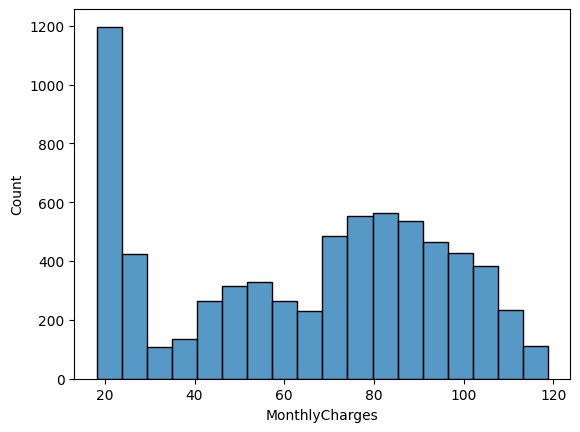

In [24]:
sns.histplot(data["MonthlyCharges"])
plt.show()

All the numerical column having null values,the distribution of the features are not normal. so we can replace the null values using median

In [25]:
for i in ["SeniorCitizen","tenure","MonthlyCharges"]:
      data[i] = data[i].fillna(data[i].median())

In [26]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Handle all the null values

In [28]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [29]:
data.dtypes

,0
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [30]:
categorical = data.select_dtypes(include=['object'])

In [31]:
categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [32]:
categorical.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [33]:
numerical = data.select_dtypes(include=['int64', 'float64'])
numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65


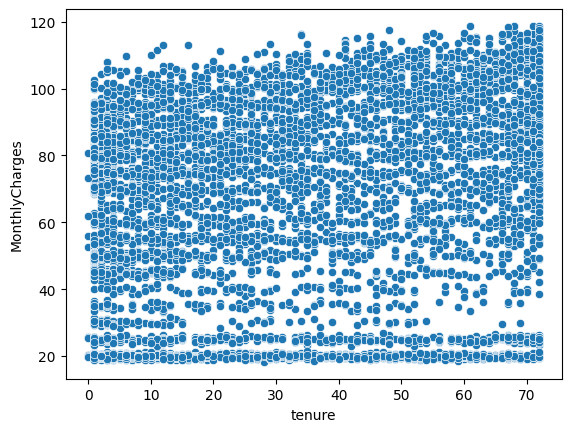

In [34]:
sns.scatterplot(x="tenure",y="MonthlyCharges",data=data)
plt.show()

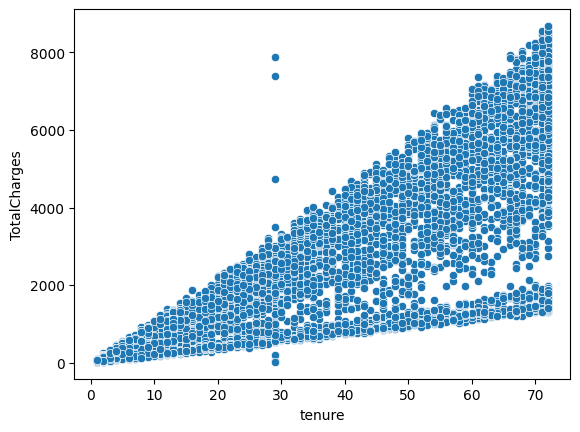

In [35]:
sns.scatterplot(x="tenure",y="TotalCharges",data=data)
plt.show()

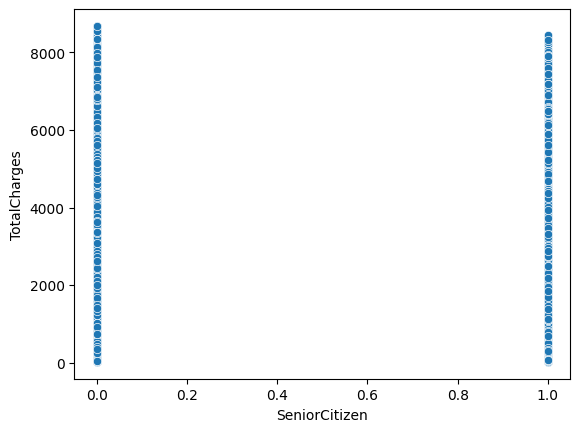

In [36]:
sns.scatterplot(x="SeniorCitizen",y="TotalCharges",data=data)
plt.show()

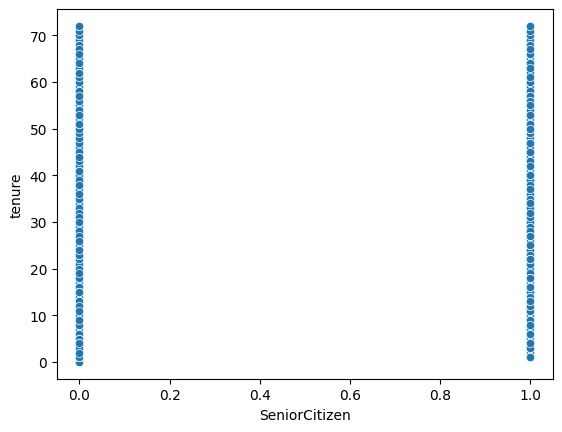

In [37]:
sns.scatterplot(x="SeniorCitizen",y="tenure",data=data)
plt.show()

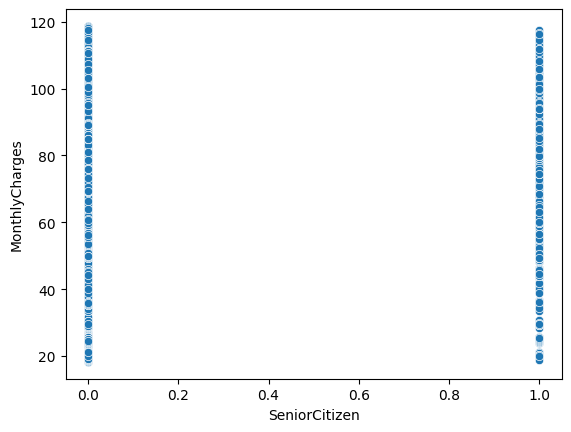

In [38]:
sns.scatterplot(x="SeniorCitizen",y="MonthlyCharges",data=data)
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])



In [41]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [45]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

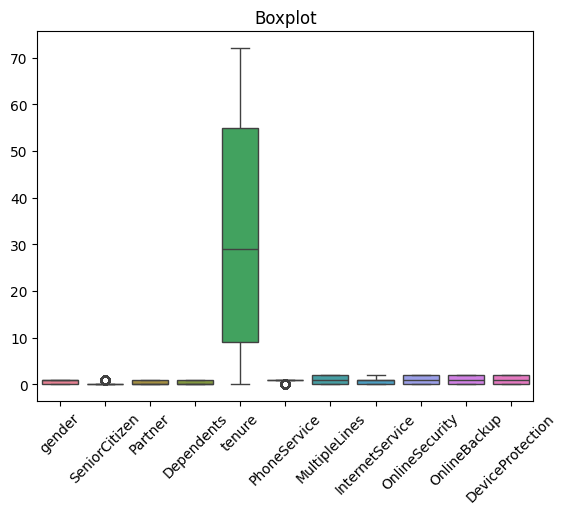

In [48]:

d1 = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                      'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection']]

sns.boxplot(data=d1)
plt.xticks(rotation=45)
plt.title("Boxplot")
plt.show()

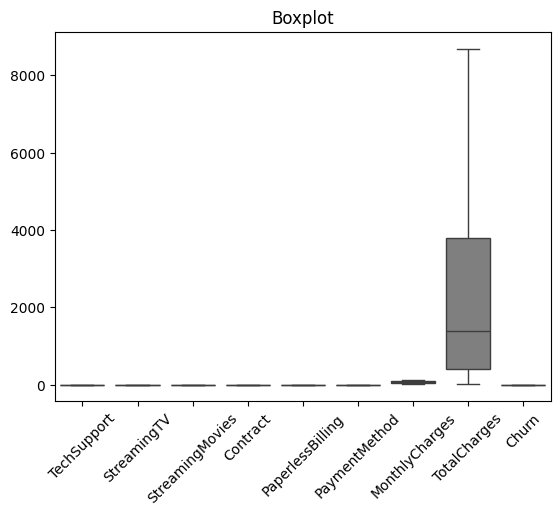

In [49]:

d2 = data[[ 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']]

sns.boxplot(data=d2)
plt.xticks(rotation=45)
plt.title("Boxplot")
plt.show()

There is no need for outlier handling because there there few outliers in two features seniorcitizen and phoneservice. which are the true values.

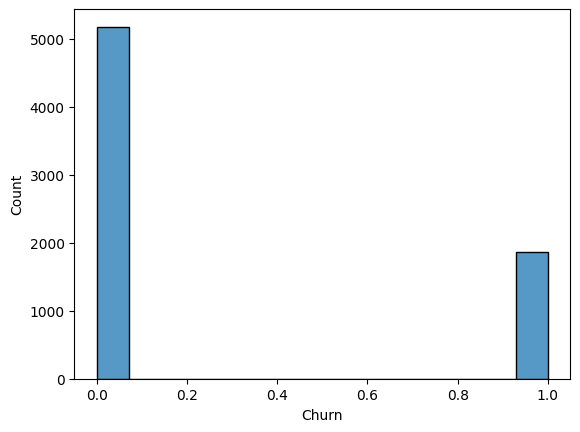

In [50]:
sns.histplot(data['Churn'])
plt.show()

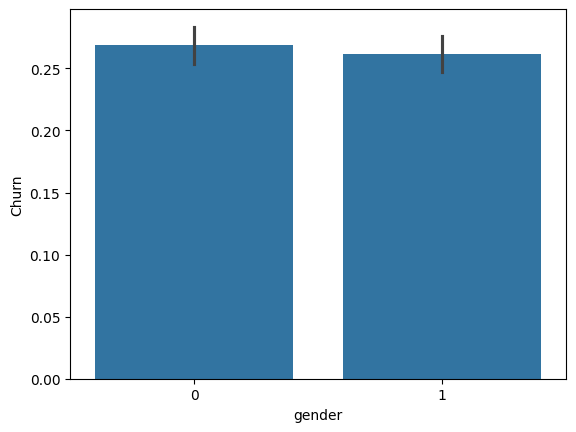

In [79]:
sns.barplot(x=data['gender'],y=data['Churn'])
plt.show()

The number of churned and non-churned customers is roughly the same for both genders.



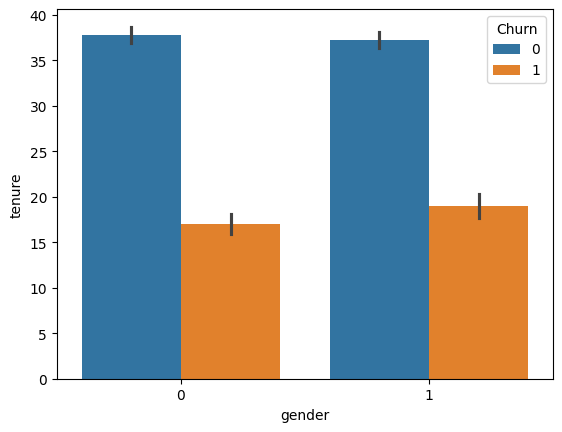

In [80]:
sns.barplot(x=data['gender'],y=data['tenure'],hue=data['Churn'])
plt.show()

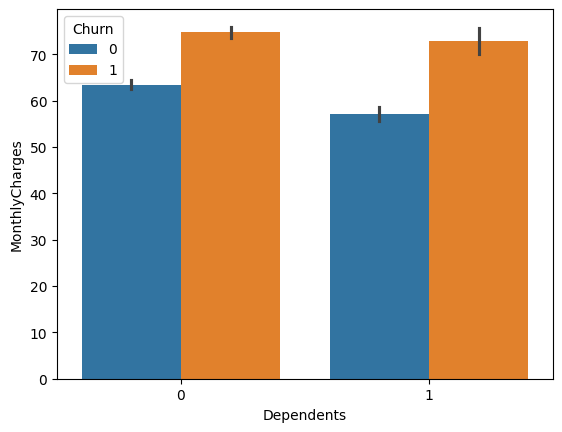

In [82]:
sns.barplot(x=data["Dependents"],y=data['MonthlyCharges'],hue=data['Churn'])
plt.show()

Customers with higher monthly charges are more likely to churn, regardless of whether they have dependents.










**Correlation**

In [52]:
correlation_matrix = data.corr()
correlation_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.002639,-0.001808,0.010517,0.005479,-0.006016,-0.006876,-0.000491,-0.015824,-0.011870,0.000091,-0.006641,-0.006705,-0.009520,0.000317,-0.011203,0.017223,-0.014759,-0.000562,-0.008612
SeniorCitizen,-0.002639,1.000000,0.016464,-0.210830,0.017974,0.010733,0.146833,-0.032538,-0.126556,-0.013395,-0.020292,-0.149753,0.032321,0.048339,-0.141059,0.155837,-0.038831,0.220620,0.103313,0.149713
Partner,-0.001808,0.016464,1.000000,0.452676,0.379588,0.017253,0.141916,0.001705,0.150958,0.152233,0.166726,0.125864,0.136835,0.130262,0.294252,-0.014226,-0.154953,0.096497,0.318923,-0.150448
Dependents,0.010517,-0.210830,0.452676,1.000000,0.158835,-0.002077,-0.026070,0.046059,0.150951,0.089993,0.079515,0.132795,0.046369,0.020788,0.242431,-0.109783,-0.040500,-0.113961,0.064366,-0.164221
tenure,0.005479,0.017974,0.379588,0.158835,1.000000,0.007716,0.342506,-0.030789,0.324808,0.371069,0.371510,0.323214,0.288947,0.297184,0.671031,0.006007,-0.370147,0.246352,0.824957,-0.351544
PhoneService,-0.006016,0.010733,0.017253,-0.002077,0.007716,1.000000,-0.020962,0.387886,-0.016465,0.022729,0.003431,-0.020320,0.054759,0.043647,0.001127,0.017678,-0.004039,0.247030,0.113013,0.012749
MultipleLines,-0.006876,0.146833,0.141916,-0.026070,0.342506,-0.020962,1.000000,-0.109668,0.008745,0.119393,0.124042,0.013447,0.176926,0.182439,0.111290,0.163030,-0.176099,0.431982,0.452065,0.037830
InternetService,-0.000491,-0.032538,0.001705,0.046059,-0.030789,0.387886,-0.109668,1.000000,-0.029542,0.035888,0.043844,-0.026666,0.106413,0.096878,0.098892,-0.136914,0.086097,-0.322287,-0.175547,-0.047240
OnlineSecurity,-0.015824,-0.126556,0.150958,0.150951,0.324808,-0.016465,0.008745,-0.029542,1.000000,0.187439,0.177541,0.286563,0.045803,0.057395,0.374695,-0.158238,-0.095778,-0.054895,0.252339,-0.288286
OnlineBackup,-0.011870,-0.013395,0.152233,0.089993,0.371069,0.022729,0.119393,0.035888,0.187439,1.000000,0.191386,0.197725,0.149786,0.139503,0.282466,-0.015073,-0.124612,0.119758,0.374542,-0.194977


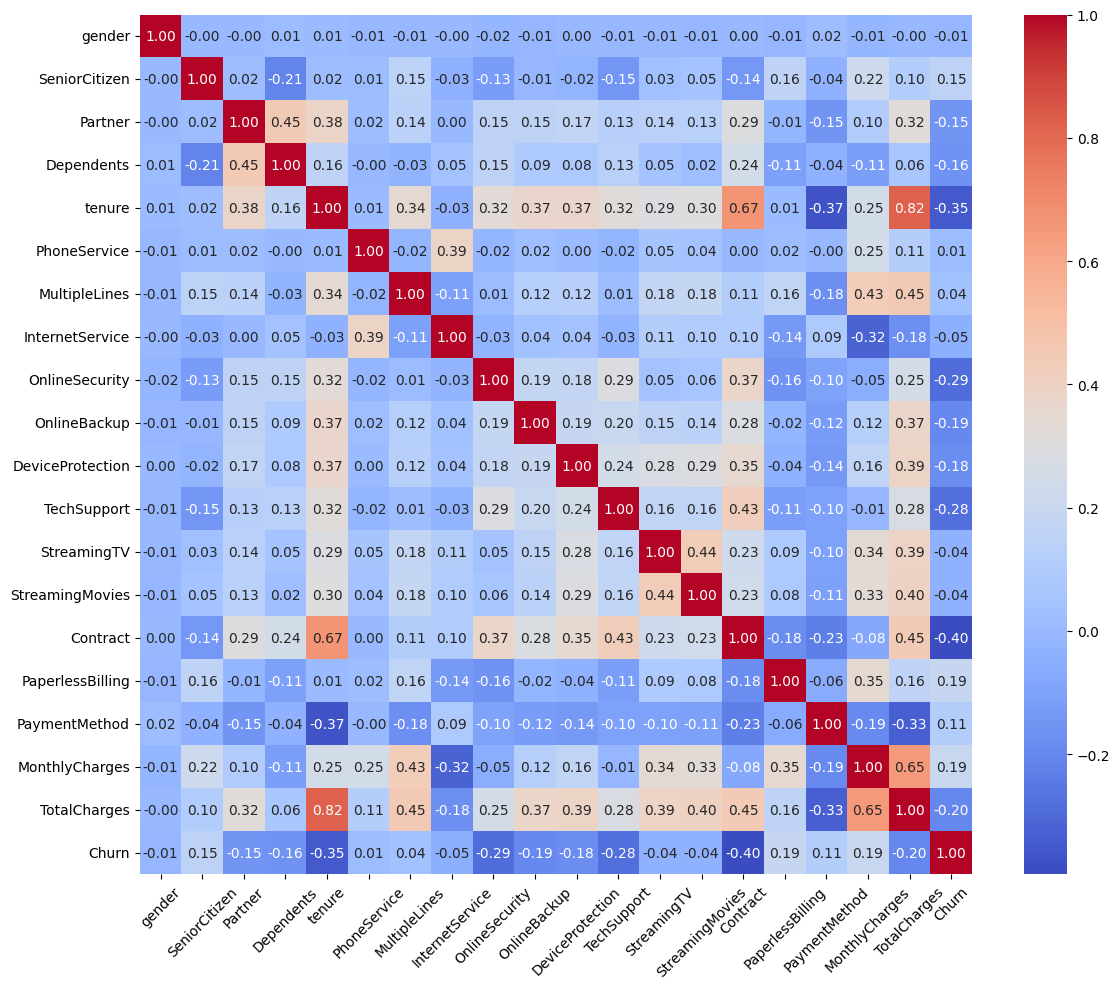

In [54]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [55]:
data.drop(["TotalCharges"],inplace=True,axis=1)

Drop the feature Totalcharges becuse totalcharges and tenure are highly correlated . we can drop one among then having less correlation with the target from the data

In [56]:
x=data.drop(["Churn"],axis=1)
y=data["Churn"]

Scaling


In [57]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
x=mm.fit_transform(x)


In [61]:
x=pd.DataFrame(x,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'])

In [62]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891


Train test split

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


Try various classification algorithms

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("accuracy of logistic:",accuracy_score(y_test,lr_pred))
print(classification_report(y_test,lr_pred))


accuracy of logistic: 0.8133427963094393
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [68]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print("accuracy of svm:",accuracy_score(y_test,svm_pred))
print(classification_report(y_test,svm_pred))


accuracy of svm: 0.8026969481902059
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [69]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
for i in range(2,11):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred=knn.predict(x_test)
  metric_k.append(accuracy_score(y_test,knn_pred))

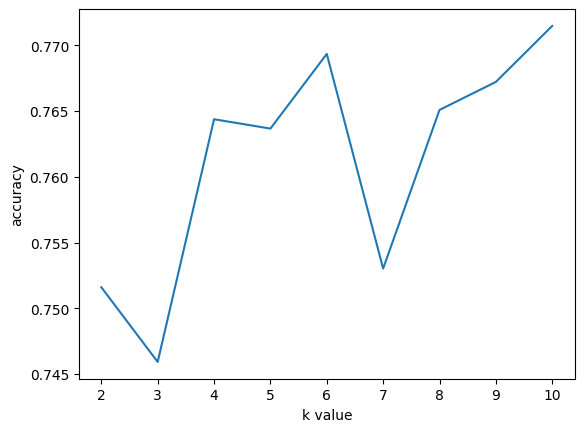

In [70]:
plt.plot(range(2,11),metric_k)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()

In [71]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print("accuracy of knn:",accuracy_score(y_test,knn_pred))
print(classification_report(y_test,knn_pred))



accuracy of knn: 0.7693399574166075
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1036
           1       0.60      0.38      0.47       373

    accuracy                           0.77      1409
   macro avg       0.70      0.64      0.66      1409
weighted avg       0.75      0.77      0.75      1409



In [72]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
print("accuracy of naive bayes:",accuracy_score(y_test,nb_pred))
print(classification_report(y_test,nb_pred))


accuracy of naive bayes: 0.7579843860894251
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [73]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print("accuracy of decision tree:",accuracy_score(y_test,dt_pred))

accuracy of decision tree: 0.7189496096522356


In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("accuracy of random forest:",accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))



accuracy of random forest: 0.7885024840312278
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



The accuracy score of logistic regression is higher compared to other models, so we chose logistic regression.

